In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
titanic = pd.read_csv('train.csv')
titanic.head()
## checking the head of our data set

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
titanic.info()
## checking info of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
titanic.shape
## checking shape of data set

(891, 11)

In [7]:
titanic.describe()
## statistical information about numerical variable

,Unnamed: 0,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,446.000000,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,446.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Data Quality Check**

handling missing values as well


In [7]:
round(100*(titanic.isnull().sum()/len(titanic)),2)
## checking missing value percentage in all columns

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [8]:
titanic.drop('Cabin',axis=1,inplace=True)
## cabin almost have 77% of missing values hence remove this column from data set

In [9]:
age_median = titanic['Age'].median(skipna=True)
titanic['Age'].fillna(age_median,inplace=True)
## as there is 19% of missing values in age column hence it is not a good idea to remove this row wise or column wise hence impute those missing values with the median of age 


In [10]:
titanic = titanic[titanic['Embarked'].isnull()!=True]
## as embarked has a very small amount of missing values hence remove those rows which have missing values in embarked column 


In [11]:
titanic.shape
## checking shape after removing null values

(889, 11)

# duplicate check

In [12]:
titanic_dub = titanic.copy()
## creating copy of the data frame to check duplicate values

In [13]:
titanic_dub.shape
## comparing shapes of two data frames

(889, 11)

In [14]:
titanic.shape
## shape of original data frame

(889, 11)

# checking for outliers

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
## importing libraries for data visualitation

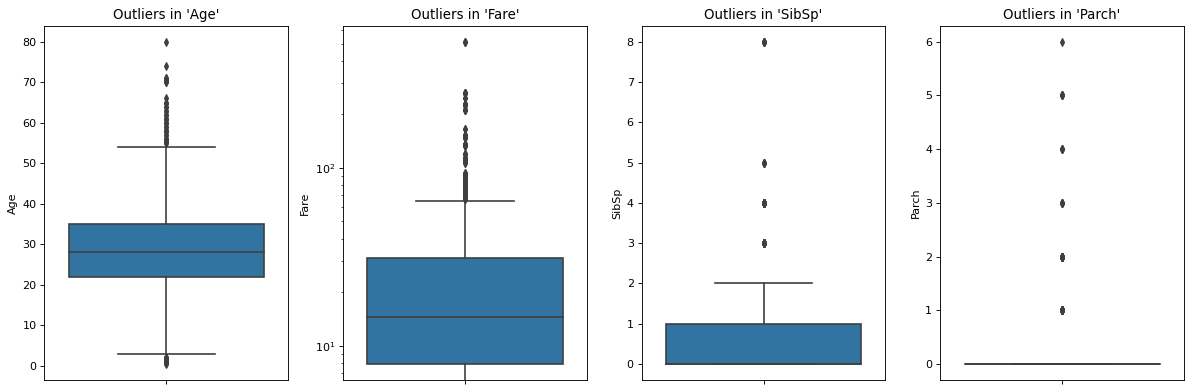

In [16]:
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,4,1)
sns.boxplot(y=titanic['Age'])
plt.title("Outliers in 'Age'")

plt.subplot(1,4,2)
ax = sns.boxplot(y=titanic['Fare'])
ax.set_yscale('log')
plt.title("Outliers in 'Fare'")

plt.subplot(1,4,3)
sns.boxplot(y=titanic['SibSp'])
plt.title("Outliers in 'SibSp'")


plt.subplot(1,4,4)
sns.boxplot(y=titanic['Parch'])
plt.title("Outliers in 'Parch'")
#ax.set_yscale('log')
plt.tight_layout()
plt.show()

## plotting all four variables to check for outliers
## it clearly shows that all four variables has some outliers

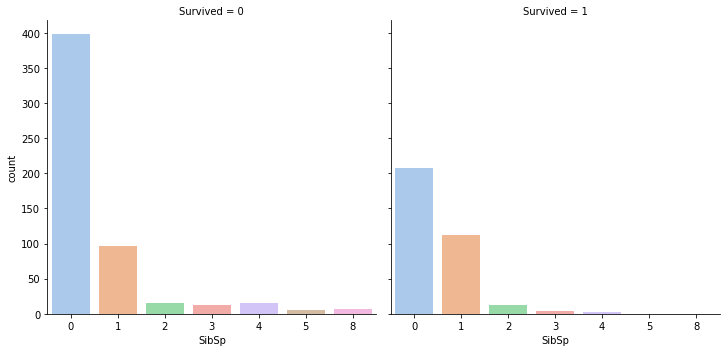

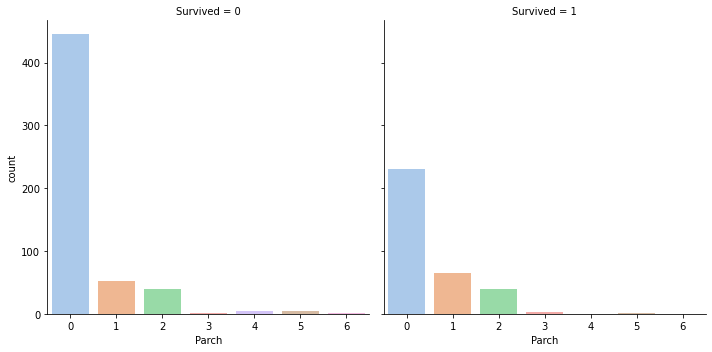

In [17]:


sns.catplot(x="SibSp", col = 'Survived', data=titanic, kind = 'count', palette='pastel')
sns.catplot(x="Parch", col = 'Survived', data=titanic, kind = 'count', palette='pastel')
plt.tight_layout()
plt.show()

## plotting of sibsp and parch in basis of survived and not survived

sibsp and parch basically tells us that whether a person is accompanied by someone else or not 
so we can make two category by merging them to find whether a single person is acompanied by some one else or not 

In [18]:
def alone(x):
    if (x['SibSp']+x['Parch']>0):
        return (1)
    else:
        return (0)
titanic['Alone'] = titanic.apply(alone,axis=1)
## creating a function to make one variable which tells us whether a person is single or accompanied by some on the ship

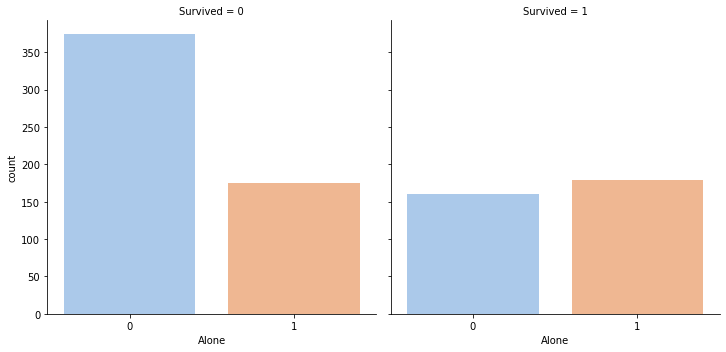

In [19]:
sns.catplot(x="Alone", col = 'Survived', data=titanic, kind = 'count', palette='pastel')
plt.show()

it clearly shows that those person who are not alone survived more

In [20]:
## drop parch and sibsp
titanic = titanic.drop(['Parch','SibSp'],axis=1)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


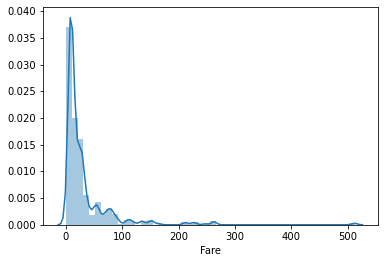

In [21]:
sns.distplot(titanic['Fare'])
plt.show()

there is some skewness in the fare column 
hence removing the skewness using log function

In [22]:
titanic['Fare'] = titanic['Fare'].map(lambda x: np.log(x) if x>0 else 0)
## converting fare into a logarithmic scale

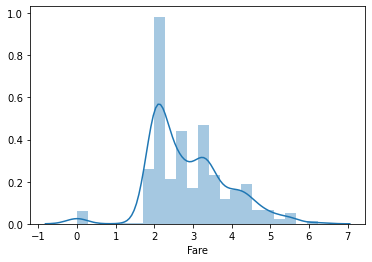

In [23]:
sns.distplot(titanic['Fare'])
plt.show()
## again check the distribution of fare 

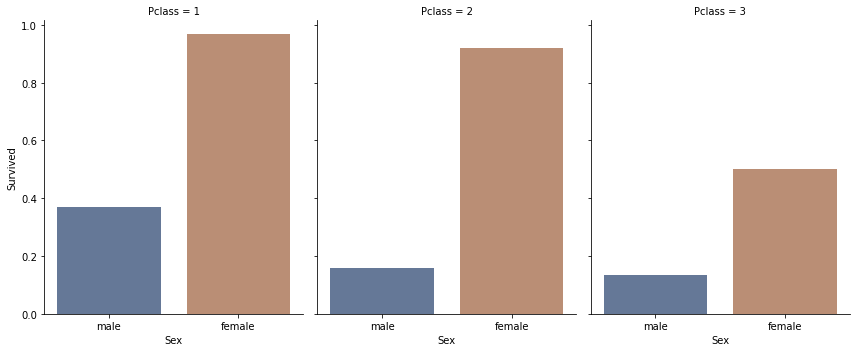

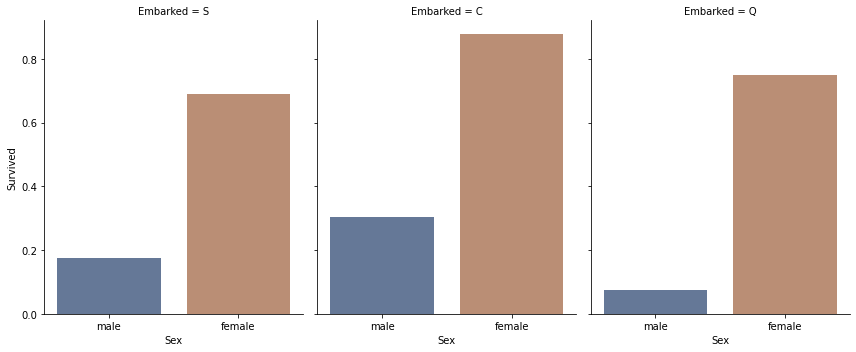

In [24]:
sns.catplot(x="Sex", y="Survived", col="Pclass", data=titanic, saturation=.5, kind="bar", ci=None, aspect=0.8, palette='deep')
sns.catplot(x="Sex", y="Survived", col="Embarked", data=titanic, saturation=.5, kind="bar", ci=None, aspect=0.8, palette='deep')
plt.show()

## plotting of survive on basis of pclass

females are more likely to be survived

In [25]:
survived_0 = titanic[titanic['Survived']==0]
survived_1 = titanic[titanic['Survived']==1]
## divided our dataset into survived or not survived to check the distribution of age in both the cases 

In [26]:
survived_0.shape
## checking shape of the data set that contains the data of passengers who not survived

(549, 10)

In [27]:
survived_1.shape
## checking shape of the data set that contains the data of passengers who survived

(340, 10)

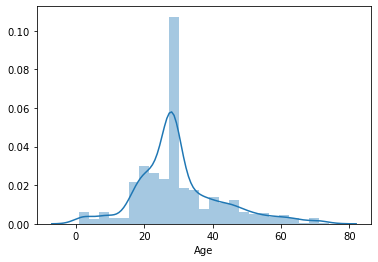

In [28]:
sns.distplot(survived_0['Age'])
plt.show()
## checking distribution of age in not survived data set

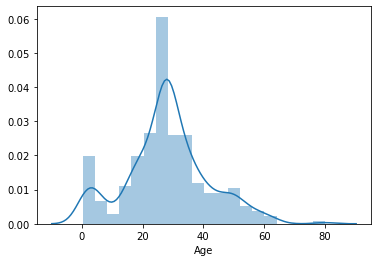

In [29]:
sns.distplot(survived_1['Age'])
plt.show()
## checking distribution of age in survived dataset

young persons are survived more (age group between 20-40)

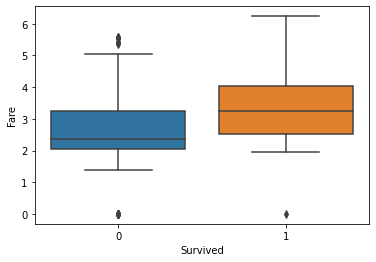

In [30]:
sns.boxplot(x='Survived',y='Fare',data=titanic)
plt.show()
## checking survival rate on basis of fare

those who are survived paid more fares

# creating dummy variables

In [31]:
Pclass_dummy = pd.get_dummies(titanic['Pclass'],prefix='Pclass',drop_first=True)
Pclass_dummy.head()
## creating dummy variables for pclass



,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [32]:
## joing dummy variables
titanic = pd.concat([titanic,Pclass_dummy],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Alone,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,1.981001,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,4.266662,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,2.070022,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,3.972177,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,2.085672,S,0,0,1


In [33]:
titanic.drop('Pclass',axis=1,inplace=True)
## as there is no use of pclass after joining the columns that contains dummy variables  for pclass

In [34]:
Embarked_dummy = pd.get_dummies(titanic['Embarked'],drop_first=True)
Embarked_dummy.head()
## creating dummy variables for embarked and dropping first column

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
titanic = pd.concat([titanic,Embarked_dummy],axis=1)
titanic.drop('Embarked',axis=1,inplace=True)
## joining dummy variables

In [36]:
titanic.head()
## checking head of the data set after joining dummy variables

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Alone,Pclass_2,Pclass_3,Q,S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,1.981001,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,4.266662,1,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,2.070022,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,3.972177,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,2.085672,0,0,1,0,1


In [37]:
def sex_map(x):
    if x == 'male':
        return (1)
    elif x == 'female':
        return (0)
titanic['Sex'] = titanic['Sex'].apply(lambda x:sex_map(x))

## creating function for convert sex into binary values

In [38]:
from sklearn.preprocessing import StandardScaler
## import libraries for scaling data

In [39]:
scaler = StandardScaler()
cols = ['Age','Fare']
titanic[cols] = scaler.fit_transform(titanic[cols])
titanic.head()

## using standardization method of scaling for age and fare variables

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Alone,Pclass_2,Pclass_3,Q,S
0,1,0,"Braund, Mr. Owen Harris",1,-0.563674,A/5 21171,-0.908614,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.669217,PC 17599,1.374828,1,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,-0.255451,STON/O2. 3101282,-0.819680,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.438050,113803,1.080629,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,0.438050,373450,-0.804045,0,0,1,0,1


no use of passengerid name and ticket column in our prediction

In [40]:
titanic.drop(['Name','Ticket'],axis=1,inplace=True)
## dropping name and ticket column

In [41]:
titanic.head()
## checking head after converting all values

,PassengerId,Survived,Sex,Age,Fare,Alone,Pclass_2,Pclass_3,Q,S
0,1,0,1,-0.563674,-0.908614,1,0,1,0,1
1,2,1,0,0.669217,1.374828,1,0,0,0,0
2,3,1,0,-0.255451,-0.819680,0,0,1,0,1
3,4,1,0,0.438050,1.080629,1,0,0,0,1
4,5,0,1,0.438050,-0.804045,0,0,1,0,1


In [42]:
titanic.set_index('PassengerId')
## set index as passengerid


,Survived,Sex,Age,Fare,Alone,Pclass_2,Pclass_3,Q,S
PassengerId,,,,,,,,,
1,0,1,-0.563674,-0.908614,1,0,1,0,1
2,1,0,0.669217,1.374828,1,0,0,0,0
3,1,0,-0.255451,-0.819680,0,0,1,0,1
4,1,0,0.438050,1.080629,1,0,0,0,1
5,0,1,0.438050,-0.804045,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,1,-0.178396,-0.325233,0,1,0,0,1
888,1,0,-0.794841,0.510203,0,0,0,0,1
889,0,0,-0.101340,0.264116,1,0,1,0,1


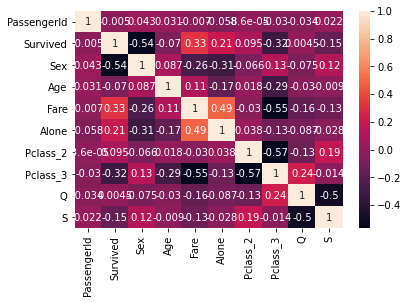

In [43]:
## creating heatmap for checking corelations of variables
sns.heatmap(titanic.corr(),annot=True)
plt.show()

there are some highly co related dummy variables hence removing such columns

In [44]:
titanic.drop(['Pclass_2','Q'],axis=1,inplace=True)
## removing highly co related dummy variables pclass_2 and q

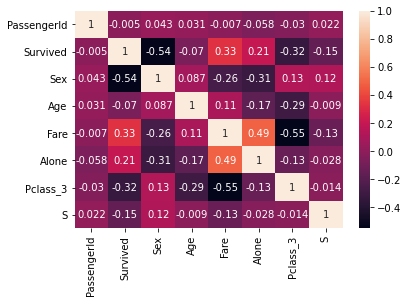

In [45]:
sns.heatmap(titanic.corr(),annot=True)
plt.show()
## again checking co relations of variables

In [46]:
y_train = titanic.pop('Survived')
X_train = titanic
## divided train data into x and y as independent and dependent variable

In [49]:
X_train = titanic[['Sex','Age','Fare','Alone','Pclass_3','S']]
X_train.head()
## selectig all columns insted of passengerid for our x
## checking head of x after that

,Sex,Age,Fare,Alone,Pclass_3,S
0,1,-0.563674,-0.908614,1,1,1
1,0,0.669217,1.374828,1,0,0
2,0,-0.255451,-0.819680,0,1,1
3,0,0.438050,1.080629,1,0,1
4,1,0.438050,-0.804045,0,1,1


In [50]:
import statsmodels.api as sm
## import stats model to build our first model

In [51]:
logm1 = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -402.93
Date:                Mon, 10 Aug 2020   Deviance:                       805.86
Time:                        19:06:13   Pearson chi2:                     919.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3639      0.271      8.739      0.000       1.834       2.894
Sex           -2.5120      0.193    -13.047      0.000      -2.889      -2.135
Age           -0.3702      0.094     -3.923      0.000      -0.555      -0.185
Fare           0.2826      0.128      2.209      0.027       0.032       0.533
Alone         -0.2485      0.220     -1.128      0.259      -0.680       0.183
Pclass_3      -1.5241      0.227     -6.715      0.000      -1.969      -1.079
S             -0.6255      0.196     -3.190      0.001      -1.010      -0.241
==============================================================================
"""

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Pclass_3,2.79
5,S,2.67
0,Sex,2.52
3,Alone,2.21
2,Fare,1.89
1,Age,1.13


In [54]:
## removing alone as it has high p value 
X_train.drop('Alone',axis=1,inplace=True)

In [55]:
logm2 = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -403.58
Date:                Mon, 10 Aug 2020   Deviance:                       807.15
Time:                        19:06:13   Pearson chi2:                     924.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2658      0.254      8.923      0.000       1.768       2.763
Sex           -2.4633      0.186    -13.211      0.000      -2.829      -2.098
Age           -0.3494      0.092     -3.783      0.000      -0.530      -0.168
Fare           0.2067      0.107      1.938      0.053      -0.002       0.416
Pclass_3      -1.5685      0.223     -7.030      0.000      -2.006      -1.131
S             -0.6429      0.195     -3.295      0.001      -1.025      -0.261
==============================================================================
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Sex,2.52
3,Pclass_3,2.44
4,S,2.39
2,Fare,1.22
1,Age,1.10


In [57]:
X_train.drop('Fare',axis=1,inplace=True)

In [58]:
logm3 = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -405.51
Date:                Mon, 10 Aug 2020   Deviance:                       811.02
Time:                        19:06:14   Pearson chi2:                     930.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4616      0.235     10.486      0.000       2.002       2.922
Sex           -2.5227      0.185    -13.667      0.000      -2.884      -2.161
Age           -0.3523      0.092     -3.809      0.000      -0.534      -0.171
Pclass_3      -1.7843      0.194     -9.209      0.000      -2.164      -1.405
S             -0.6973      0.193     -3.616      0.000      -1.075      -0.319
==============================================================================
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Sex,2.52
3,S,2.31
2,Pclass_3,2.09
1,Age,1.10


our final model is done

In [60]:
X_train.columns

Index(['Sex', 'Age', 'Pclass_3', 'S'], dtype='object')

In [61]:
y_train_pred = res3.predict(sm.add_constant(X_train))


In [62]:
y_train_pred[:10]

0    0.087534
1    0.902550
2    0.517498
3    0.833410
4    0.063152
5    0.140680
6    0.193341
7    0.141699
8    0.510718
9    0.946714
dtype: float64

In [63]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08753442, 0.90254997, 0.51749812, 0.83341014, 0.06315166,
       0.14067982, 0.19334091, 0.1416989 , 0.51071778, 0.94671411])

In [64]:
final_pred = pd.DataFrame({'Survived':y_train.values,'Survived_prob':y_train_pred})
final_pred['PassengerId'] = np.arange(1,len(final_pred)+1)
final_pred.head()


,Survived,Survived_prob,PassengerId
0,0,0.087534,1
1,1,0.902550,2
2,1,0.517498,3
3,1,0.833410,4
4,0,0.063152,5


In [65]:
final_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       889 non-null    int64  
 1   Survived_prob  889 non-null    float64
 2   PassengerId    889 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


In [66]:
final_pred['predicted'] = final_pred['Survived_prob'].apply(lambda x: 1 if x>0.5 else 0)
final_pred.head()

,Survived,Survived_prob,PassengerId,predicted
0,0,0.087534,1,0
1,1,0.902550,2,1
2,1,0.517498,3,1
3,1,0.833410,4,1
4,0,0.063152,5,0


checking accurecy of the model

In [67]:
from sklearn import metrics

In [68]:
confusion = metrics.confusion_matrix(final_pred.Survived,final_pred.predicted)
print(confusion)

[[477  72]
 [105 235]]


In [69]:
metrics.accuracy_score(final_pred.Survived,final_pred.predicted)

0.8008998875140607

In [70]:
## lets define all values of confusion matrix
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [71]:
## lets calculate sensitivity
TP/float(TP+FN)

0.6911764705882353

In [72]:
## lets calculate specificity
TN/float(TN+FP)

0.8688524590163934

In [73]:
## false positive rate 
FP/ float(TN+FP)

0.13114754098360656

In [74]:
## positive predictive value
TP / float(TP+FP)

0.7654723127035831

In [75]:
## negative predictive value 
TN / float(TN+ FN)

0.8195876288659794

# plotting ROC curve

In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve( final_pred.Survived, final_pred.Survived_prob, drop_intermediate = False )

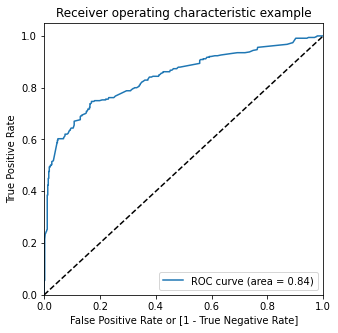

In [78]:
draw_roc(final_pred.Survived, final_pred.Survived_prob)

# finding optimal cutoff point

In [79]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    final_pred[i]= final_pred.Survived_prob.map(lambda x: 1 if x > i else 0)
final_pred.head()

,Survived,Survived_prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.087534,1,0,1,0,0,0,0,0,0,0,0,0
1,1,0.902550,2,1,1,1,1,1,1,1,1,1,1,1
2,1,0.517498,3,1,1,1,1,1,1,1,0,0,0,0
3,1,0.833410,4,1,1,1,1,1,1,1,1,1,1,0
4,0,0.063152,5,0,1,0,0,0,0,0,0,0,0,0


In [80]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(final_pred.Survived, final_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382452  1.000000  0.000000
0.1   0.1  0.592801  0.923529  0.387978
0.2   0.2  0.683915  0.861765  0.573770
0.3   0.3  0.721035  0.800000  0.672131
0.4   0.4  0.789651  0.750000  0.814208
0.5   0.5  0.800900  0.691176  0.868852
0.6   0.6  0.807649  0.602941  0.934426
0.7   0.7  0.795276  0.508824  0.972678
0.8   0.8  0.771654  0.423529  0.987250
0.9   0.9  0.668166  0.135294  0.998179


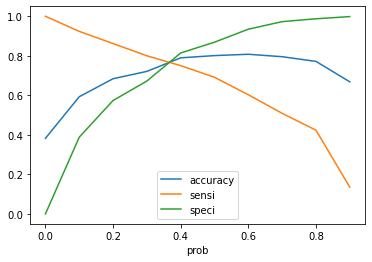

In [81]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [82]:
final_pred['final_predicted'] = final_pred['Survived_prob'].apply(lambda x: 1 if x>0.3 else 0)
final_pred.head()

,Survived,Survived_prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.087534,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.902550,2,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.517498,3,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.833410,4,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.063152,5,0,1,0,0,0,0,0,0,0,0,0,0


In [83]:
final_confusion = metrics.confusion_matrix(final_pred.Survived,final_pred.final_predicted)
print(final_confusion)

[[369 180]
 [ 68 272]]


In [84]:
metrics.accuracy_score(final_pred.Survived,final_pred.final_predicted)

0.7210348706411699

In [85]:
## lets define all values of confusion matrix
TN = final_confusion[0,0]
FP = final_confusion[0,1]
FN = final_confusion[1,0]
TP = final_confusion[1,1]

In [86]:
## lets calculate sensitivity
TP/float(TP+FN)

0.8

In [87]:
## lets calculate specificity
TN/float(TN+FP)

0.6721311475409836

In [88]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.32786885245901637


In [89]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6017699115044248


In [90]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8443935926773455


In [91]:
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [93]:
titanic_test['Sex'] = titanic_test['Sex'].apply(lambda x:sex_map(x))
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
titanic_test.drop(['Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [95]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,34.5,7.8292,Q
1,893,3,0,47.0,7.0000,S
2,894,2,1,62.0,9.6875,Q
3,895,3,1,27.0,8.6625,S
4,896,3,0,22.0,12.2875,S


In [96]:
Pclass = pd.get_dummies(titanic_test['Pclass'],prefix = 'Pclass')
Pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [97]:
titanic_test = pd.concat([titanic_test,Pclass],axis=1)


In [98]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,892,3,1,34.5,7.8292,Q,0,0,1
1,893,3,0,47.0,7.0000,S,0,0,1
2,894,2,1,62.0,9.6875,Q,0,1,0
3,895,3,1,27.0,8.6625,S,0,0,1
4,896,3,0,22.0,12.2875,S,0,0,1


In [99]:
Embarked = pd.get_dummies(titanic_test['Embarked'])

In [100]:
titanic_test = pd.concat([titanic_test,Embarked],axis=1)

In [101]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,C,Q,S
0,892,3,1,34.5,7.8292,Q,0,0,1,0,1,0
1,893,3,0,47.0,7.0000,S,0,0,1,0,0,1
2,894,2,1,62.0,9.6875,Q,0,1,0,0,1,0
3,895,3,1,27.0,8.6625,S,0,0,1,0,0,1
4,896,3,0,22.0,12.2875,S,0,0,1,0,0,1


In [102]:
titanic_test.drop(['Pclass','Embarked','Pclass_1','Pclass_2','C','Q'],axis=1,inplace=True)

In [103]:
titanic_test[['Age','Fare']] = scaler.transform(titanic_test[['Age','Fare']])

In [104]:
titanic_test.drop('Fare',axis=1,inplace=True)

In [105]:
age_median = titanic_test['Age'].median(skipna=True)
titanic_test['Age'].fillna(age_median,inplace=True)

In [106]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   Age          418 non-null    float64
 3   Pclass_3     418 non-null    uint8  
 4   S            418 non-null    uint8  
dtypes: float64(1), int64(2), uint8(2)
memory usage: 10.7 KB


In [107]:
X_test = titanic_test[['Sex', 'Age', 'Pclass_3', 'S']]

In [108]:
X_test.columns

Index(['Sex', 'Age', 'Pclass_3', 'S'], dtype='object')

In [109]:
y_test_pred = res3.predict(sm.add_constant(X_test))

In [110]:
y_test_pred.head()

0    0.120671
1    0.377543
2    0.279233
3    0.077284
4    0.544530
dtype: float64

In [111]:
test_final = pd.DataFrame({'PassengerId': titanic_test.PassengerId,'Survived_prob':y_test_pred.values})
test_final.head()

,PassengerId,Survived_prob
0,892,0.120671
1,893,0.377543
2,894,0.279233
3,895,0.077284
4,896,0.544530


In [112]:
test_final['Survived'] = test_final['Survived_prob'].apply(lambda x:1 if x>0.3 else 0)
test_final.head()

,PassengerId,Survived_prob,Survived
0,892,0.120671,0
1,893,0.377543,1
2,894,0.279233,0
3,895,0.077284,0
4,896,0.544530,1


In [113]:
test_final.drop('Survived_prob',axis=1,inplace = True)

In [114]:
test_final.to_csv("prediction_titanic.csv",index=False)

# checking model validation using ks statistics

It stands for Kolmogorov–Smirnov which is named after Andrey Kolmogorov and Nikolai Smirnov. It compares the two cumulative distributions and returns the maximum difference between them. It is a non-parametric test which means you don't need to test any assumption related to the distribution of data. In KS Test, Null hypothesis states null both cumulative distributions are similar. Rejecting the null hypothesis means cumulative distributions are different.
In data science, it compares the cumulative distribution of events and non-events and KS is where there is a maximum difference between the two distributions. In simple words, it helps us to understand how well our predictive model is able to discriminate between events and non-events.

In [115]:
final_pred.head()

,Survived,Survived_prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.087534,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.902550,2,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.517498,3,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.833410,4,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.063152,5,0,1,0,0,0,0,0,0,0,0,0,0


In [116]:
ks_stat_check = final_pred.iloc[ : ,[1,14]]

In [117]:
ks_stat_check.shape

(889, 2)

In [118]:
## using function for calculate ks statistics
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [119]:
mydf = ks(data=ks_stat_check,target="final_predicted", prob="Survived_prob")


        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.864629  0.959917      89          0     19.69%         0.00%   
2       0.738614  0.863642      89          0     19.69%         0.00%   
3       0.534312  0.733575      89          0     19.69%         0.00%   
4       0.403376  0.531037      88          0     19.47%         0.00%   
5       0.313155  0.402034      85          0     18.81%         0.00%   
6       0.189143  0.309139      12         81      2.65%        18.54%   
7       0.131121  0.188959       0         89      0.00%        20.37%   
8       0.087534  0.129001       0         88      0.00%        20.14%   
9       0.077284  0.085391       0         35      0.00%         8.01%   
10      0.022853  0.075370       0        144      0.00%        32.95%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             19.69

event means survived (1) and non events means not survived (0)
this matrix used to check the discriminatory power of the model